[View in Colaboratory](https://colab.research.google.com/github/kintarou/django-starter/blob/master/opencv_machine_learning.ipynb)

In [13]:

import numpy as np
np.__version__

'1.14.6'

In [0]:
from sklearn import datasets

mnist = datasets.fetch_mldata('MNIST original')

In [15]:
mnist.data.shape

(70000, 784)

In [16]:

mnist.target.shape

(70000,)

In [17]:
np.unique(mnist.target)

array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.])

In [0]:

import matplotlib as mpl
import matplotlib.pyplot as plt

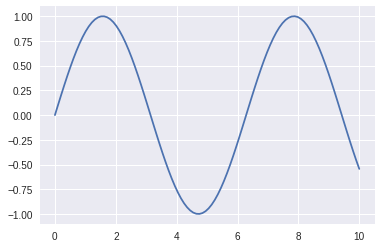

In [19]:
x = np.linspace(0, 10, 100)
plt.plot(x, np.sin(x))
%matplotlib inline
plt.plot(x, np.sin(x))

In [76]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
% matplotlib inline
digits = datasets.load_digits()
print(digits.data.shape)
print(digits.images.shape)

(1797, 64)
(1797, 8, 8)


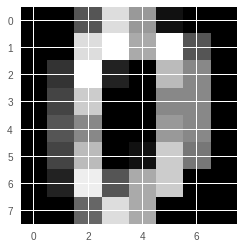

In [77]:
img = digits.images[0, :, :]
plt.imshow(img, cmap='gray')

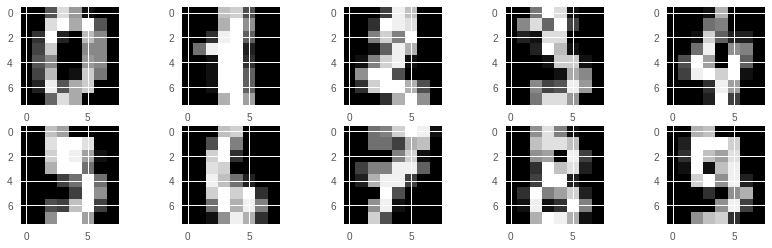

In [78]:
plt.figure(figsize=(14, 4))

for image_index in range(10):
    # images are 0-indexed, subplots are 1-indexed
    subplot_index = image_index + 1
    plt.subplot(2, 5, subplot_index)
    plt.imshow(digits.images[image_index, :, :], cmap='gray')

In [79]:
np.random.seed(42)
y_true = np.random.randint(0, 2, size=5)
y_true

array([0, 1, 0, 0, 0])

In [80]:
y_pred = np.ones(5, dtype=np.int32)
y_pred

array([1, 1, 1, 1, 1], dtype=int32)

In [81]:
np.sum(y_true == y_pred) / len(y_true)

0.2

In [82]:
from sklearn import metrics
metrics.accuracy_score(y_true, y_pred)

0.2

In [83]:
truly_a_positive = (y_true == 1)
predicted_a_positive = (y_pred == 1)
true_positive = np.sum(predicted_a_positive * truly_a_positive)
true_positive

1

In [84]:
false_negative = np.sum((y_pred == 0) * (y_true == 1))
false_negative

0

In [85]:
false_positive = np.sum((y_pred == 1) * (y_true == 0))
false_positive

4

In [86]:
true_negative = np.sum((y_pred == 0) * (y_true == 0))
true_negative

0

In [87]:
accuracy = np.sum(true_positive + true_negative) / len(y_true)
accuracy

0.2

In [88]:

precision = np.sum(true_positive) / np.sum(true_positive + false_positive)
precision

0.2

In [89]:

metrics.precision_score(y_true, y_pred)

0.2

In [90]:

recall = true_positive / (true_positive + false_negative)
recall

1.0

In [91]:
metrics.recall_score(y_true, y_pred)

1.0

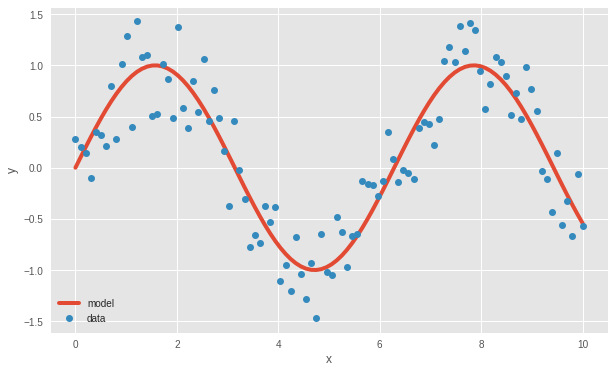

In [92]:
x = np.linspace(0, 10, 100)
y_true = np.sin(x) + np.random.rand(x.size) - 0.5
y_pred = np.sin(x)
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline
plt.figure(figsize=(10, 6))
plt.plot(x, y_pred, linewidth=4, label='model')
plt.plot(x, y_true, 'o', label='data')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='lower left')

In [93]:
mse=np.mean((y_true-y_pred)**2)
mse

0.08531839480842378

In [95]:
metrics.mean_squared_error(y_true, y_pred)

0.08531839480842378

In [107]:
import numpy as np
import cv2

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
np.random.seed(42)

single_data_point = np.random.randint(0, 100, 2)
single_data_point

array([51, 92])

In [108]:
single_label = np.random.randint(0, 2)
single_label

0

In [109]:
def generate_data(num_samples, num_features=2):
    """Randomly generates a number of data points"""
    data_size = (num_samples, num_features)
    train_data = np.random.randint(0, 100, size=data_size)
    labels_size = (num_samples, 1)
    labels = np.random.randint(0, 2, size=labels_size)
    
    return train_data.astype(np.float32), labels
train_data, labels = generate_data(11)
train_data

array([[71., 60.],
       [20., 82.],
       [86., 74.],
       [74., 87.],
       [99., 23.],
       [ 2., 21.],
       [52.,  1.],
       [87., 29.],
       [37.,  1.],
       [63., 59.],
       [20., 32.]], dtype=float32)

In [110]:
train_data[0], labels[0]

(array([71., 60.], dtype=float32), array([1]))

Text(0,0.5,'y coordinate')

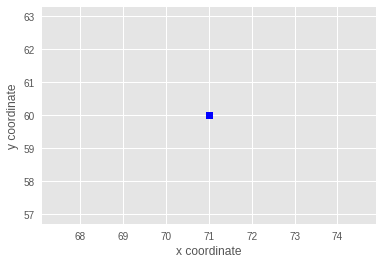

In [111]:
plt.plot(train_data[0, 0], train_data[0, 1], 'sb')
plt.xlabel('x coordinate')
plt.ylabel('y coordinate')

In [112]:

def plot_data(all_blue, all_red):
    plt.figure(figsize=(10, 6))
    plt.scatter(all_blue[:, 0], all_blue[:, 1], c='b', marker='s', s=180)
    plt.scatter(all_red[:, 0], all_red[:, 1], c='r', marker='^', s=180)
    plt.xlabel('x coordinate (feature 1)')
    plt.ylabel('y coordinate (feature 2)')

labels.ravel() == 0    

array([False, False, False,  True, False,  True,  True,  True,  True,
        True, False])

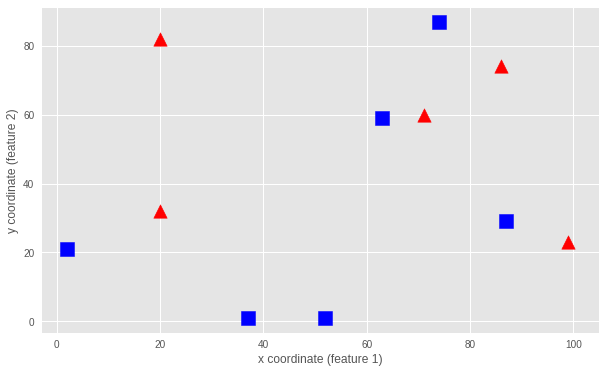

In [113]:
blue = train_data[labels.ravel() == 0]
red = train_data[labels.ravel() == 1]
plot_data(blue, red)

In [114]:

knn = cv2.ml.KNearest_create()
knn.train(train_data, cv2.ml.ROW_SAMPLE, labels)

True

In [115]:
newcomer, _ = generate_data(1)
newcomer

array([[91., 59.]], dtype=float32)

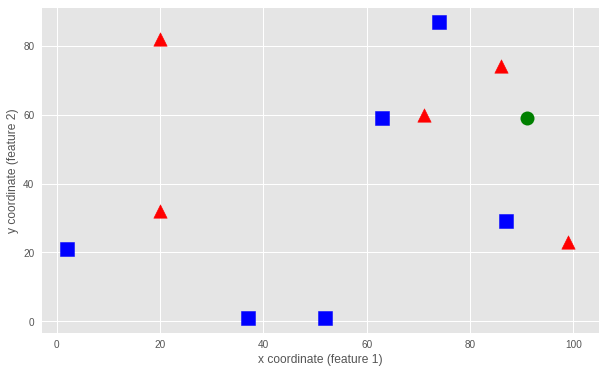

In [116]:

plot_data(blue, red)
plt.plot(newcomer[0, 0], newcomer[0, 1], 'go', markersize=14);

In [117]:
ret, results, neighbor, dist = knn.findNearest(newcomer, 1)
print("Predicted label:\t", results)
print("Neighbor's label:\t", neighbor)
print("Distance to neighbor:\t", dist)

Predicted label:	 [[1.]]
Neighbor's label:	 [[1.]]
Distance to neighbor:	 [[250.]]


In [118]:
ret, results, neighbor, dist = knn.findNearest(newcomer, 7)
print("Predicted label:\t", results)
print("Neighbor's label:\t", neighbor)
print("Distance to neighbor:\t", dist)

Predicted label:	 [[0.]]
Neighbor's label:	 [[1. 1. 0. 0. 0. 1. 0.]]
Distance to neighbor:	 [[ 250.  401.  784.  916. 1073. 1360. 4885.]]


In [119]:
ret, results, neighbors, dist = knn.findNearest(newcomer, 6)
print("Predicted label:\t", results)
print("Neighbors' labels:\t", neighbors)
print("Distance to neighbors:\t", dist)

Predicted label:	 [[0.]]
Neighbors' labels:	 [[1. 1. 0. 0. 0. 1.]]
Distance to neighbors:	 [[ 250.  401.  784.  916. 1073. 1360.]]


In [120]:
knn.setDefaultK(7)
knn.predict(newcomer)

(0.0, array([[0.]], dtype=float32))

In [121]:
knn.setDefaultK(6)
knn.predict(newcomer)

(0.0, array([[0.]], dtype=float32))

In [1]:
import numpy as np
import cv2

from sklearn import datasets
from sklearn import metrics
from sklearn import model_selection
from sklearn import linear_model

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.rcParams.update({'font.size': 16})

boston = datasets.load_boston()
dir(boston)

['DESCR', 'data', 'feature_names', 'target']

In [2]:
boston.data.shape

(506, 13)

In [3]:
boston.target.shape

(506,)

In [4]:

linreg = linear_model.LinearRegression()
X_train, X_test, y_train, y_test = model_selection.train_test_split(
    boston.data, boston.target, test_size=0.1, random_state=42
)
linreg.fit(X_train, y_train)

metrics.mean_squared_error(y_train, linreg.predict(X_train))

22.739484154236614

In [5]:
linreg.score(X_train, y_train)


0.7374934091901197

In [6]:
y_pred = linreg.predict(X_test)
metrics.mean_squared_error(y_test, y_pred)

15.010997321630107

Text(0,0.5,'target value')

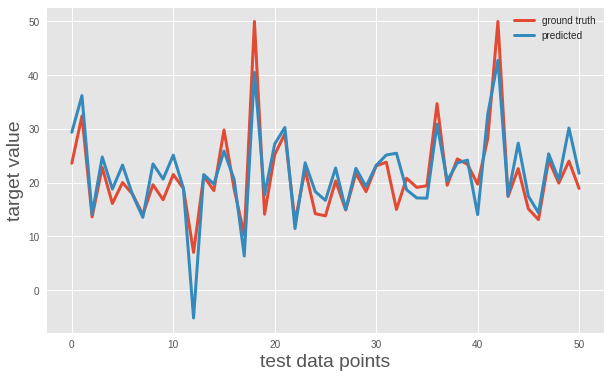

In [7]:

plt.figure(figsize=(10, 6))
plt.plot(y_test, linewidth=3, label='ground truth')
plt.plot(y_pred, linewidth=3, label='predicted')
plt.legend(loc='best')
plt.xlabel('test data points')
plt.ylabel('target value')

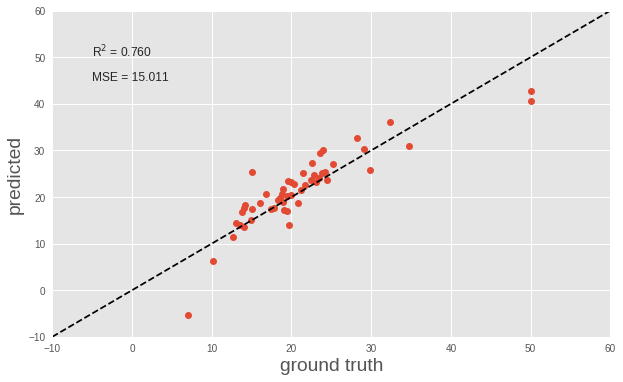

In [8]:
plt.figure(figsize=(10, 6))
plt.plot(y_test, y_pred, 'o')
plt.plot([-10, 60], [-10, 60], 'k--')
plt.axis([-10, 60, -10, 60])
plt.xlabel('ground truth')
plt.ylabel('predicted')

scorestr = r'R$^2$ = %.3f' % linreg.score(X_test, y_test)
errstr = 'MSE = %.3f' % metrics.mean_squared_error(y_test, y_pred)
plt.text(-5, 50, scorestr, fontsize=12)
plt.text(-5, 45, errstr, fontsize=12);

In [18]:
lassoreg = linear_model.Lasso()
X_train, X_test, y_train, y_test = model_selection.train_test_split(
    boston.data, boston.target, test_size=0.1, random_state=42
)
lassoreg.fit(X_train, y_train)


Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [19]:
y_pred = lassoreg.predict(X_test)
metrics.mean_squared_error(y_test, y_pred)

18.660542345877925

Text(0,0.5,'target value')

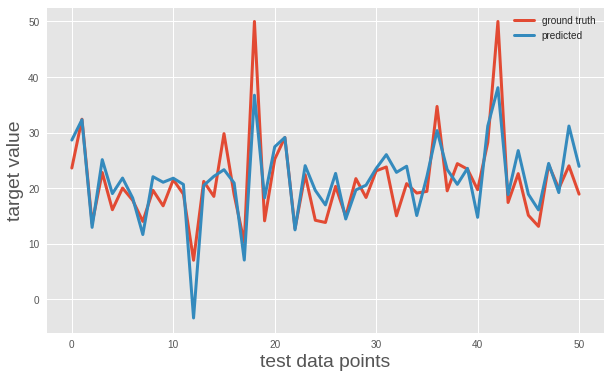

In [20]:
plt.figure(figsize=(10, 6))
plt.plot(y_test, linewidth=3, label='ground truth')
plt.plot(y_pred, linewidth=3, label='predicted')
plt.legend(loc='best')
plt.xlabel('test data points')
plt.ylabel('target value')

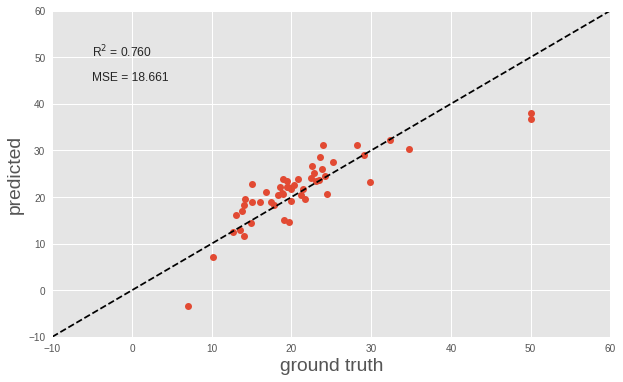

In [21]:
plt.figure(figsize=(10, 6))
plt.plot(y_test, y_pred, 'o')
plt.plot([-10, 60], [-10, 60], 'k--')
plt.axis([-10, 60, -10, 60])
plt.xlabel('ground truth')
plt.ylabel('predicted')

scorestr = r'R$^2$ = %.3f' % linreg.score(X_test, y_test)
errstr = 'MSE = %.3f' % metrics.mean_squared_error(y_test, y_pred)
plt.text(-5, 50, scorestr, fontsize=12)
plt.text(-5, 45, errstr, fontsize=12);

In [22]:
ridgereg = linear_model.Ridge()
X_train, X_test, y_train, y_test = model_selection.train_test_split(
    boston.data, boston.target, test_size=0.1, random_state=42
)
ridgereg.fit(X_train, y_train)


Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [23]:
y_pred = ridgereg.predict(X_test)
metrics.mean_squared_error(y_test, y_pred)

14.785888941249883

Text(0,0.5,'target value')

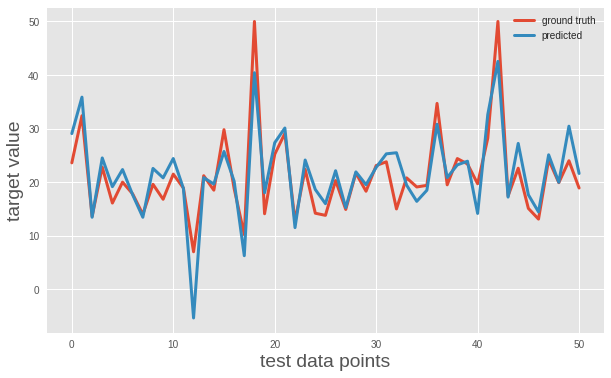

In [24]:
plt.figure(figsize=(10, 6))
plt.plot(y_test, linewidth=3, label='ground truth')
plt.plot(y_pred, linewidth=3, label='predicted')
plt.legend(loc='best')
plt.xlabel('test data points')
plt.ylabel('target value')

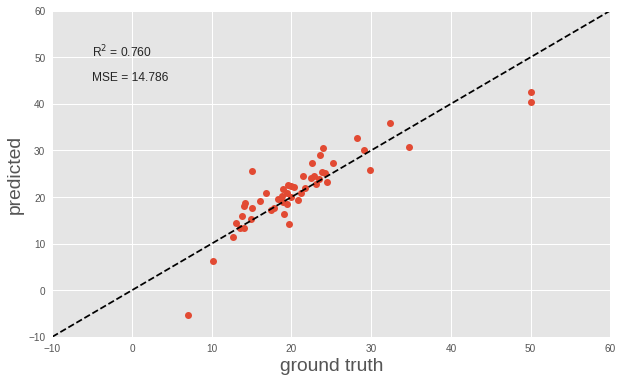

In [25]:
plt.figure(figsize=(10, 6))
plt.plot(y_test, y_pred, 'o')
plt.plot([-10, 60], [-10, 60], 'k--')
plt.axis([-10, 60, -10, 60])
plt.xlabel('ground truth')
plt.ylabel('predicted')

scorestr = r'R$^2$ = %.3f' % linreg.score(X_test, y_test)
errstr = 'MSE = %.3f' % metrics.mean_squared_error(y_test, y_pred)
plt.text(-5, 50, scorestr, fontsize=12)
plt.text(-5, 45, errstr, fontsize=12);